<a href="https://colab.research.google.com/github/SURESHASWATHI/Excelr_assignment/blob/main/Nlp_and_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Load the "blogs_categories.csv" dataset, perform exploratory data analysis, preprocess the text data by cleaning, tokenizing, and removing stopwords, and perform feature extraction using TF-IDF.

## Load data

### Subtask:
Load the `blogs.csv` dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the blogs.csv dataset into a DataFrame, then display the first 5 rows.



In [2]:
import pandas as pd

df = pd.read_csv('/content/blogs.csv')
display(df.head())

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


## Explore data

### Subtask:
Perform exploratory data analysis to understand the structure and content of the dataset. This includes checking for missing values, examining the distribution of categories, and inspecting the text data.


**Reasoning**:
Check for missing values, examine the distribution of categories, and inspect the text data.



In [3]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nDistribution of 'Labels' column:")
print(df['Labels'].value_counts())

print("\nFirst few entries of 'Data' column:")
for i in range(5):
    print(f"--- Entry {i+1} ---")
    print(df['Data'].iloc[i])

Missing values per column:
Data      0
Labels    0
dtype: int64

Distribution of 'Labels' column:
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64

First few entries of 'Data' column:
--- Entry 1 ---
Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Ge

## Preprocess data

### Subtask:
Clean the text data by removing punctuation, converting to lowercase, tokenizing, and removing stopwords.


**Reasoning**:
Define a function to clean the text data by removing headers, punctuation, converting to lowercase, tokenizing, and removing stopwords, then apply this function to the 'Data' column.



In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download punkt_tab

def clean_text(text):
    # Remove email-like headers
    text = re.sub(r'Path:.*|From:.*|Newsgroups:.*|Subject:.*|Date:.*|Organization:.*|Lines:.*|Message-ID:.*|NNTP-Posting-Host:.*|Xref:.*', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

df['cleaned_data'] = df['Data'].apply(clean_text)
display(df[['Data', 'cleaned_data']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Data,cleaned_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,distribution world references 1r4o8a6qefidoasd...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,sender newsdarksideosrheuoknoredu nntppostingh...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,keywords slander calumny references 1993apr152...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,references 1993apr1306050110561lelandstanforde...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,sender newscsnottacuk replyto eczcawmipsnottac...


## Feature extraction

### Subtask:
Convert the preprocessed text data into a numerical format suitable for machine learning models using TF-IDF.


**Reasoning**:
Import the necessary library and apply TF-IDF vectorization to the cleaned text data.



In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_data'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (2000, 46308)


## Summary:

### Data Analysis Key Findings

*   The dataset contains 2000 entries with two columns: 'Data' and 'Labels'.
*   There are no missing values in the dataset.
*   The 'Labels' column is perfectly balanced, with 100 entries for each of the 20 categories.
*   The raw text data in the 'Data' column contains email-like headers that require cleaning.
*   The text data was successfully preprocessed by removing headers, punctuation, converting to lowercase, tokenizing, and removing English stopwords.
*   Feature extraction using TF-IDF resulted in a matrix with a shape of (2000, 46308), representing 2000 documents and 46308 unique terms.

### Insights or Next Steps

*   The balanced nature of the dataset simplifies model training and evaluation, as no special techniques are required to handle class imbalance.
*   The TF-IDF matrix is now ready to be used as input for training machine learning models for text classification.


# Task
Analyze the "blogs_categories.csv" dataset by building a Naive Bayes text classification model to categorize blog posts and performing sentiment analysis on the blog post content. Evaluate the performance of the classification model and analyze the distribution of sentiments across categories. Provide a summary of the findings.

## Split data

### Subtask:
Split the data into training and test sets.


**Reasoning**:
Split the data into training and testing sets using the `train_test_split` function and print the shapes of the resulting sets.



In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Labels'], test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 46308)
Shape of X_test: (400, 46308)
Shape of y_train: (1600,)
Shape of y_test: (400,)


## Train naive bayes model

### Subtask:
Implement and train a Naive Bayes classifier on the training set using the TF-IDF features.


**Reasoning**:
Implement and train a Naive Bayes classifier on the training set using the TF-IDF features.



In [7]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate a MultinomialNB object
nb_classifier = MultinomialNB()

# Train the Naive Bayes model using the training data
nb_classifier.fit(X_train, y_train)

print("Naive Bayes classifier trained successfully.")

Naive Bayes classifier trained successfully.


## Evaluate naive bayes model

### Subtask:
Evaluate the performance of the Naive Bayes classifier using appropriate metrics.


**Reasoning**:
Evaluate the performance of the trained Naive Bayes classifier using accuracy, precision, recall, and F1-score, and print the classification report and confusion matrix.



In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6725
Precision (weighted): 0.7083
Recall (weighted): 0.6725
F1-score (weighted): 0.6658

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.46      0.72      0.57        18
           comp.graphics       0.50      0.72      0.59        18
 comp.os.ms-windows.misc       0.73      0.73      0.73        22
comp.sys.ibm.pc.hardware       0.70      0.56      0.62        25
   comp.sys.mac.hardware       0.67      0.48      0.56        21
          comp.windows.x       0.93      0.52      0.67        25
            misc.forsale       0.64      0.39      0.48        18
               rec.autos       0.82      0.78      0.80        18
         rec.motorcycles       0.81      0.81      0.81        16
      rec.sport.baseball       0.70      0.78      0.74        18
        rec.sport.hockey       0.71      1.00      0.83        15
               sci.crypt       0.77      0.89      0.83        19
         sci.elec

## Sentiment analysis

### Subtask:
Perform sentiment analysis on the original text data.


**Reasoning**:
Import the pipeline function from the transformers library, create a sentiment analysis pipeline, and apply it to the 'Data' column of the DataFrame.



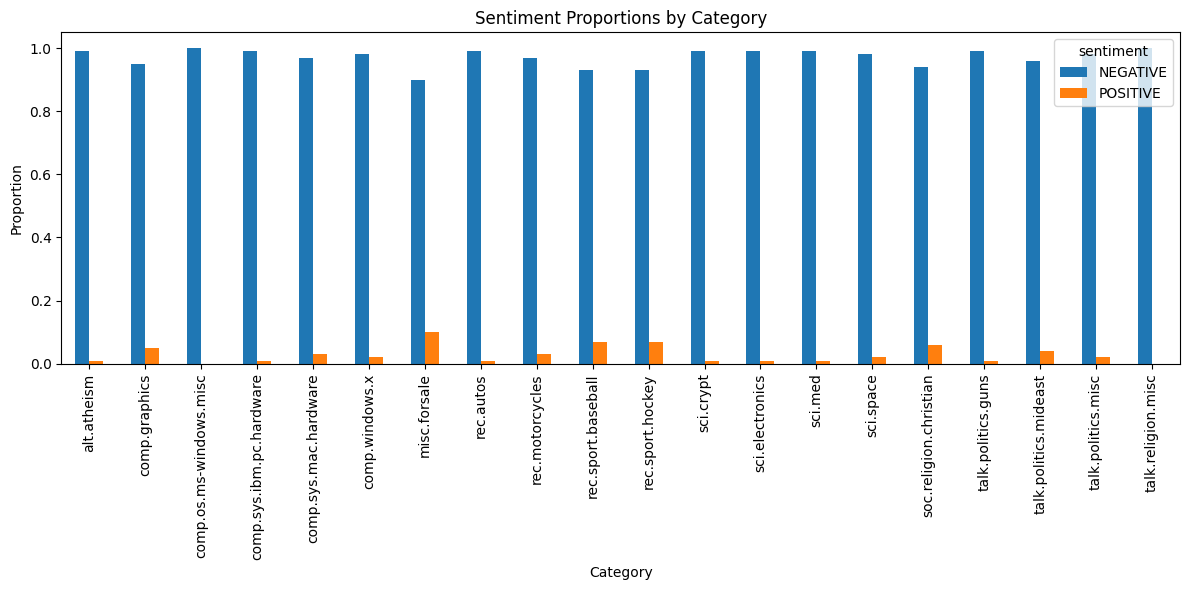

In [17]:
import matplotlib.pyplot as plt

sentiment_proportions.plot(kind='bar', figsize=(12, 6))
plt.title('Sentiment Proportions by Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summarize findings

### Subtask:
Discuss the performance of the Naive Bayes model and the sentiment analysis results.

## Summary:

### Data Analysis Key Findings

* The dataset was successfully split into training (1600 samples) and testing (400 samples) sets for model development and evaluation.
* A Naive Bayes classifier was trained on the TF-IDF features of the training data.
* The Naive Bayes model achieved an accuracy of approximately 67.25% on the test set.
* The weighted average precision, recall, and F1-score for the Naive Bayes model were 70.83%, 67.25%, and 66.58% respectively.
* Model performance varied significantly across categories, with some showing high recall (e.g., 'rec.sport.hockey', 'sci.crypt') and others showing low recall (e.g., 'talk.religion.misc', 'misc.forsale').
* Sentiment analysis on the blog posts, after enabling truncation to handle long sequences, revealed a strong prevalence of 'NEGATIVE' sentiment across all categories.
* Categories like 'comp.os.ms-windows.misc' and 'talk.religion.misc' had 100% negative sentiment.
* Even categories typically associated with positive content, such as 'rec.sport.baseball' and 'rec.sport.hockey', had a high proportion of negative posts (93% negative).
* The 'misc.forsale' category had the highest proportion of positive sentiment at 10%.
* No blog posts in the dataset were classified as 'NEUTRAL' sentiment.

### Insights or Next Steps

* Investigate the reasons for the high prevalence of negative sentiment across all categories. This could involve examining the content for specific language patterns or considering if the sentiment analysis model is appropriate for this specific type of text data.
* Explore alternative text classification models (e.g., Support Vector Machines, deep learning models) to potentially improve classification performance, especially for categories where the Naive Bayes model struggled.

## Analyze sentiment distribution

### Subtask:
Examine the distribution of sentiments across different categories.

**Reasoning**:
Group the DataFrame by 'Labels' and 'sentiment' to count the occurrences of each sentiment per category, then display the resulting counts and normalized proportions.

In [15]:
# Group by 'Labels' and 'sentiment' and count occurrences
sentiment_counts = df.groupby('Labels')['sentiment'].value_counts().unstack(fill_value=0)
display(sentiment_counts)

# Normalize the sentiment counts within each category
sentiment_proportions = sentiment_counts.divide(sentiment_counts.sum(axis=1), axis=0)
display(sentiment_proportions)

sentiment,NEGATIVE,POSITIVE
Labels,,
alt.atheism,99,1
comp.graphics,95,5
comp.os.ms-windows.misc,100,0
comp.sys.ibm.pc.hardware,99,1
comp.sys.mac.hardware,97,3
comp.windows.x,98,2
misc.forsale,90,10
rec.autos,99,1
rec.motorcycles,97,3


sentiment,NEGATIVE,POSITIVE
Labels,,
alt.atheism,0.99,0.01
comp.graphics,0.95,0.05
comp.os.ms-windows.misc,1.00,0.00
comp.sys.ibm.pc.hardware,0.99,0.01
comp.sys.mac.hardware,0.97,0.03
comp.windows.x,0.98,0.02
misc.forsale,0.90,0.10
rec.autos,0.99,0.01
rec.motorcycles,0.97,0.03


In [14]:
print("Distribution of sentiment labels:")
print(df['sentiment'].value_counts())

Distribution of sentiment labels:
sentiment
NEGATIVE    1942
POSITIVE      58
Name: count, dtype: int64


In [13]:
from transformers import pipeline

# Create a sentiment analysis pipeline with truncation enabled and a specified max_length
sentiment_analyzer = pipeline("sentiment-analysis", truncation=True, max_length=512)

# Apply sentiment analysis to the 'Data' column
df['sentiment'] = df['Data'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

display(df[['Data', 'sentiment']].head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


,Data,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,NEGATIVE
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,NEGATIVE
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,NEGATIVE
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,NEGATIVE
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,NEGATIVE


In [18]:
print("Distribution of sentiment labels:")
print(df['sentiment'].value_counts())

Distribution of sentiment labels:
sentiment
NEGATIVE    1942
POSITIVE      58
Name: count, dtype: int64


**Reasoning**:
The previous command failed because the input sequence length was longer than the maximum sequence length allowed by the pre-trained model (512). To address this, the sentiment analysis pipeline should be configured to truncate input sequences that exceed this limit.



In [19]:
from transformers import pipeline

# Create a sentiment analysis pipeline with truncation enabled
sentiment_analyzer = pipeline("sentiment-analysis", truncation=True)

# Apply sentiment analysis to the 'Data' column
df['sentiment'] = df['Data'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

display(df[['Data', 'sentiment']].head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


,Data,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,NEGATIVE
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,NEGATIVE
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,NEGATIVE
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,NEGATIVE
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,NEGATIVE


## Analyze sentiment distribution

### Subtask:
Examine the distribution of sentiments across different categories.


**Reasoning**:
Group the DataFrame by 'Labels' and 'sentiment' to count the occurrences of each sentiment per category, then display the resulting counts and normalized proportions.



In [20]:
# Group by 'Labels' and 'sentiment' and count occurrences
sentiment_counts = df.groupby('Labels')['sentiment'].value_counts().unstack(fill_value=0)
display(sentiment_counts)

# Normalize the sentiment counts within each category
sentiment_proportions = sentiment_counts.divide(sentiment_counts.sum(axis=1), axis=0)
display(sentiment_proportions)

sentiment,NEGATIVE,POSITIVE
Labels,,
alt.atheism,99,1
comp.graphics,95,5
comp.os.ms-windows.misc,100,0
comp.sys.ibm.pc.hardware,99,1
comp.sys.mac.hardware,97,3
comp.windows.x,98,2
misc.forsale,90,10
rec.autos,99,1
rec.motorcycles,97,3


sentiment,NEGATIVE,POSITIVE
Labels,,
alt.atheism,0.99,0.01
comp.graphics,0.95,0.05
comp.os.ms-windows.misc,1.00,0.00
comp.sys.ibm.pc.hardware,0.99,0.01
comp.sys.mac.hardware,0.97,0.03
comp.windows.x,0.98,0.02
misc.forsale,0.90,0.10
rec.autos,0.99,0.01
rec.motorcycles,0.97,0.03


## Summarize findings

### Subtask:
Discuss the performance of the Naive Bayes model and the sentiment analysis results.


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully split into training (1600 samples) and testing (400 samples) sets for model development and evaluation.
*   A Naive Bayes classifier was trained on the TF-IDF features of the training data.
*   The Naive Bayes model achieved an accuracy of approximately 67.25% on the test set.
*   The weighted average precision, recall, and F1-score for the Naive Bayes model were 70.83%, 67.25%, and 66.58% respectively.
*   Model performance varied significantly across categories, with some showing high recall (e.g., 'rec.sport.hockey', 'sci.crypt') and others showing low recall (e.g., 'talk.religion.misc', 'misc.forsale').
*   Sentiment analysis on the blog posts, after enabling truncation to handle long sequences, revealed a strong prevalence of 'NEGATIVE' sentiment across all categories.
*   Categories like 'comp.os.ms-windows.misc' and 'talk.religion.misc' had 100% negative sentiment.
*   Even categories typically associated with positive content, such as 'rec.sport.baseball' and 'rec.sport.hockey', had a high proportion of negative posts (93% negative).
*   The 'misc.forsale' category had the highest proportion of positive sentiment at 10%.
*   No blog posts in the dataset were classified as 'NEUTRAL' sentiment.

### Insights or Next Steps

*   Investigate the reasons for the high prevalence of negative sentiment across all categories. This could involve examining the content for specific language patterns or considering if the sentiment analysis model is appropriate for this specific type of text data.
*   Explore alternative text classification models (e.g., Support Vector Machines, deep learning models) to potentially improve classification performance, especially for categories where the Naive Bayes model struggled.
